In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['GOOG']

# Set up End and Start times for data grab
tech_list = ['GOOG']

end = datetime.now()
start = datetime(end.year - 30, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [GOOG]
company_name = ["GOOGLE"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-06-12,179.750000,182.080002,177.779999,179.559998,179.559998,18600400,GOOGLE
2024-06-13,177.839996,178.509995,176.660004,176.740005,176.740005,15956900,GOOGLE
2024-06-14,175.852005,178.729996,175.852005,178.369995,178.369995,12361600,GOOGLE
2024-06-17,176.979996,179.919998,176.490005,178.779999,178.779999,15272900,GOOGLE
2024-06-18,178.789993,178.910004,175.619995,176.449997,176.449997,15640300,GOOGLE
2024-06-20,176.710007,178.740005,176.460007,177.710007,177.710007,16753200,GOOGLE
2024-06-21,178.490005,182.511993,178.059998,180.259995,180.259995,59728000,GOOGLE
2024-06-24,181.279999,182.080002,180.229996,180.789993,180.789993,18198300,GOOGLE
2024-06-25,181.145004,185.750000,181.104996,185.580002,185.580002,18797000,GOOGLE


In [3]:
# Summary Stats
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4.997000e+03
mean,44.615882,45.087899,44.171441,44.641356,44.591104,1.162104e+08
std,42.409143,42.883584,41.997762,42.455899,42.409201,1.499860e+08
min,2.470490,2.534002,2.390042,2.490913,2.488082,1.584340e+05
25%,12.983335,13.132526,12.854319,12.992551,12.977783,2.751600e+07
50%,26.924500,27.128519,26.752501,26.926573,26.895966,5.693000e+07
75%,59.848999,60.320499,59.408001,59.939999,59.871868,1.433674e+08
max,184.190002,185.929993,183.990005,185.619995,185.619995,1.650833e+09


In [4]:
# General info
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4997 entries, 2004-08-19 to 2024-06-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4997 non-null   float64
 1   High          4997 non-null   float64
 2   Low           4997 non-null   float64
 3   Close         4997 non-null   float64
 4   Adj Close     4997 non-null   float64
 5   Volume        4997 non-null   int64  
 6   company_name  4997 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 312.3+ KB


In [5]:
# Describes the following aspects of the data: Type of the data (integer, float, Python object, etc.)
GOOG.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
company_name     object
dtype: object

In [6]:
#Print the shape of Dataframe
rows, columns = GOOG.shape
print(f"\nThe Dataset has {rows} rows and {columns} columns.")


The Dataset has 4997 rows and 7 columns.


In [7]:
#Check for Null Values
print('Null Values in Dataframe:\n', df.isnull().sum())

Null Values in Dataframe:
 Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64


In [8]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,GOOGLE
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,GOOGLE
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,GOOGLE
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,GOOGLE
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,GOOGLE


In [9]:
GOOG.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-06-20,176.710007,178.740005,176.460007,177.710007,177.710007,16753200,GOOGLE
2024-06-21,178.490005,182.511993,178.059998,180.259995,180.259995,59728000,GOOGLE
2024-06-24,181.279999,182.080002,180.229996,180.789993,180.789993,18198300,GOOGLE
2024-06-25,181.145004,185.750000,181.104996,185.580002,185.580002,18797000,GOOGLE
2024-06-26,184.190002,185.929993,183.990005,185.619995,185.619995,7200656,GOOGLE


In [10]:
GOOG.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2024-06-12', '2024-06-13', '2024-06-14', '2024-06-17',
               '2024-06-18', '2024-06-20', '2024-06-21', '2024-06-24',
               '2024-06-25', '2024-06-26'],
              dtype='datetime64[ns]', name='Date', length=4997, freq=None)

In [11]:
GOOG['Year'] = GOOG.index.year
GOOG['Month'] = GOOG.index.month
GOOG['Day'] = GOOG.index.day

In [12]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,Year,Month,Day
Date,,,,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,GOOGLE,2004,8,19
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,GOOGLE,2004,8,20
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,GOOGLE,2004,8,23
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,GOOGLE,2004,8,24
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,GOOGLE,2004,8,25


#### Open price

Text(0, 0.5, 'price')

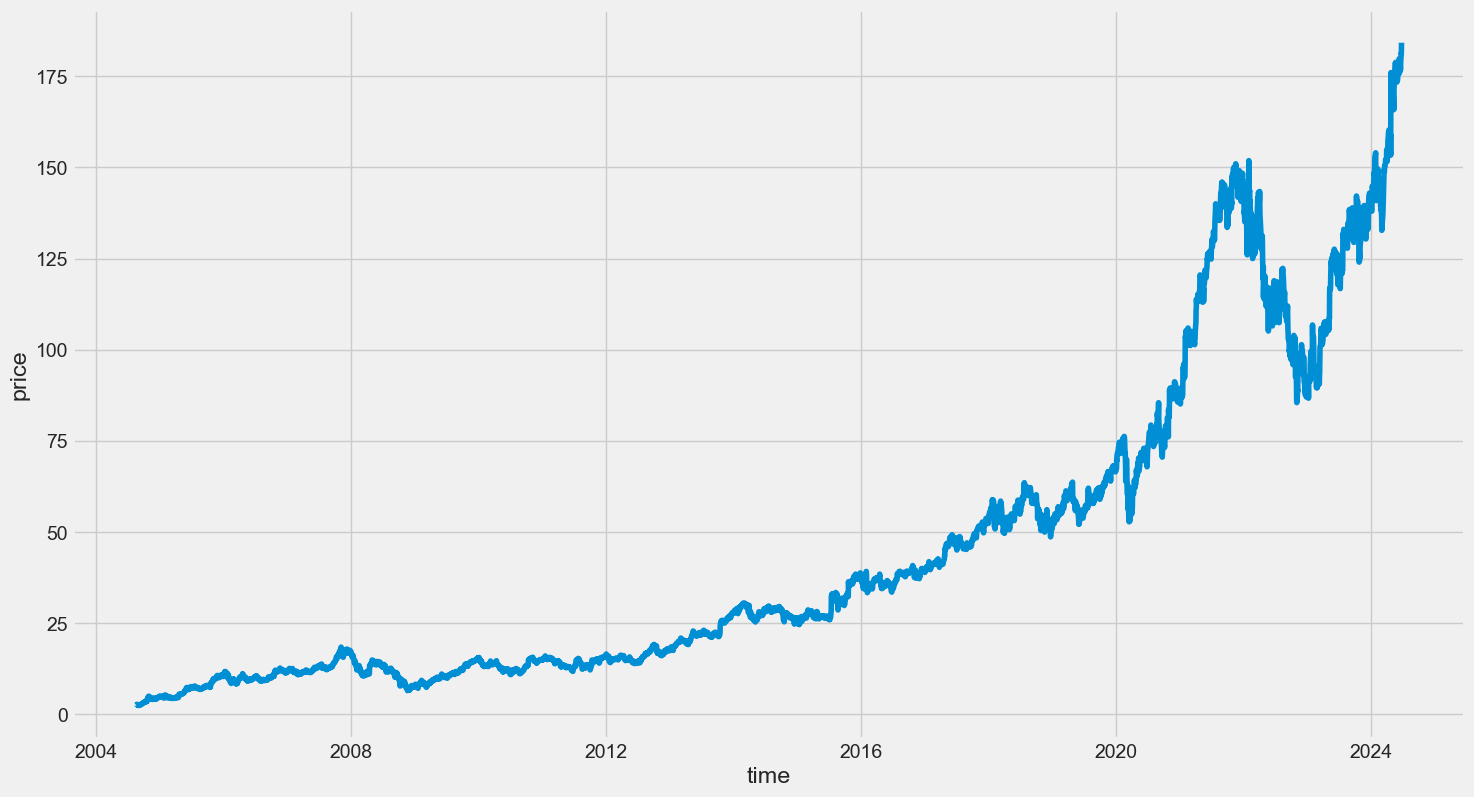

In [13]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=GOOG['Open'], x=GOOG.index)
plt.xlabel('time')
plt.ylabel('price')

#### Closing price

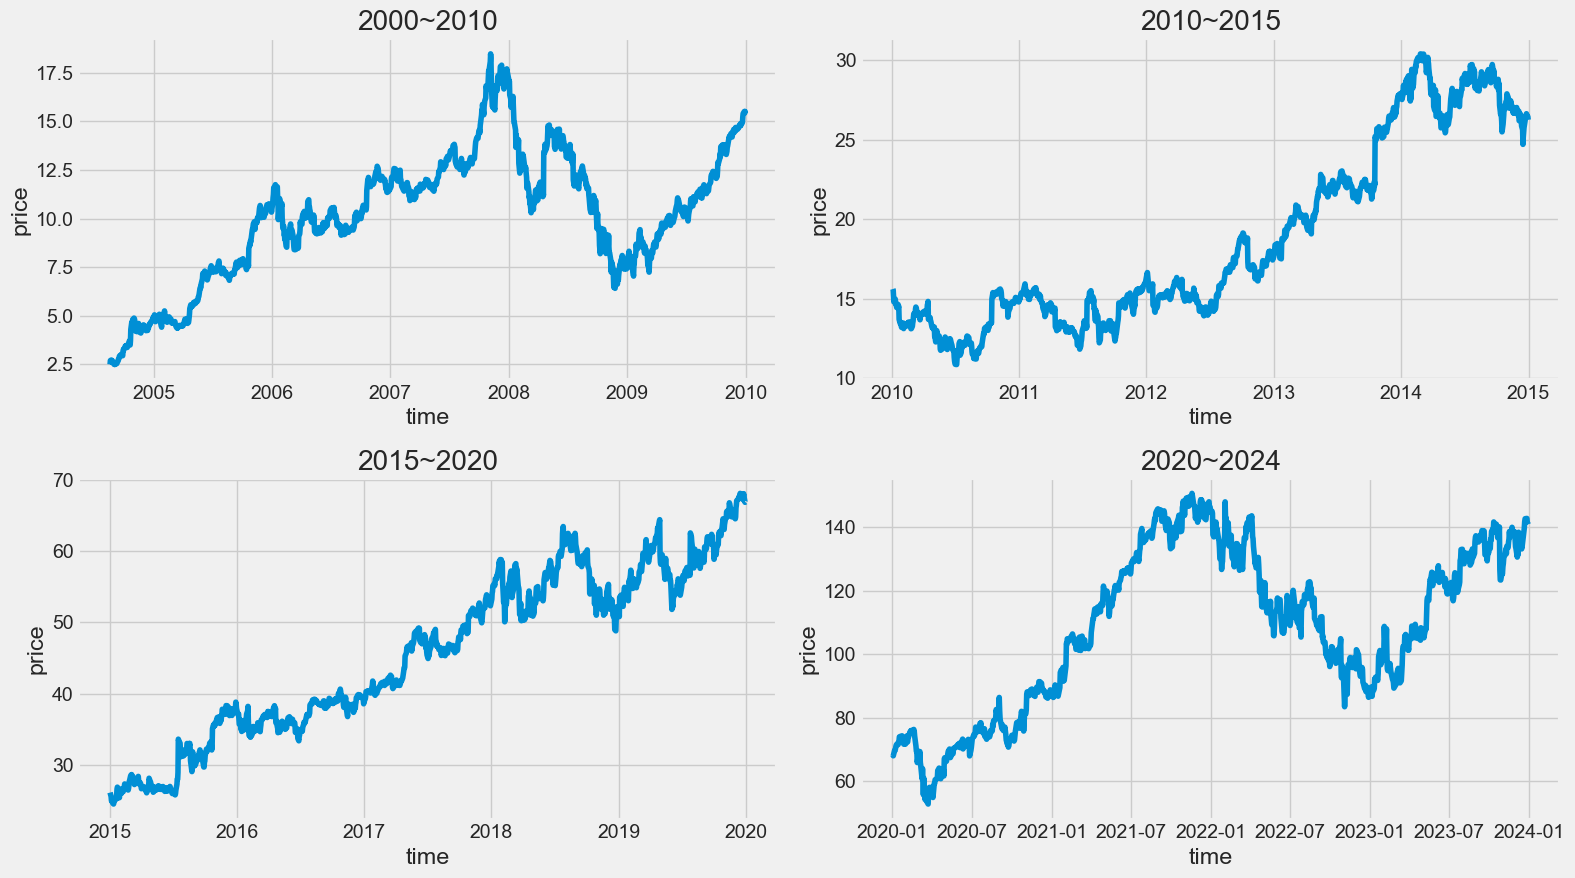

In [14]:
time_steps = [['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020'],
              ['2020', '2024']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = GOOG.loc[(GOOG.index > time_steps[i][0]) & (GOOG.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

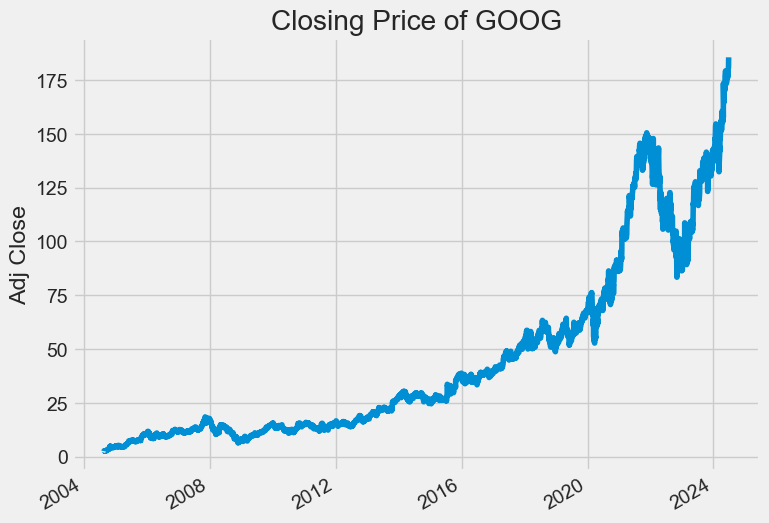

In [15]:
#historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

#### Volume of slaes

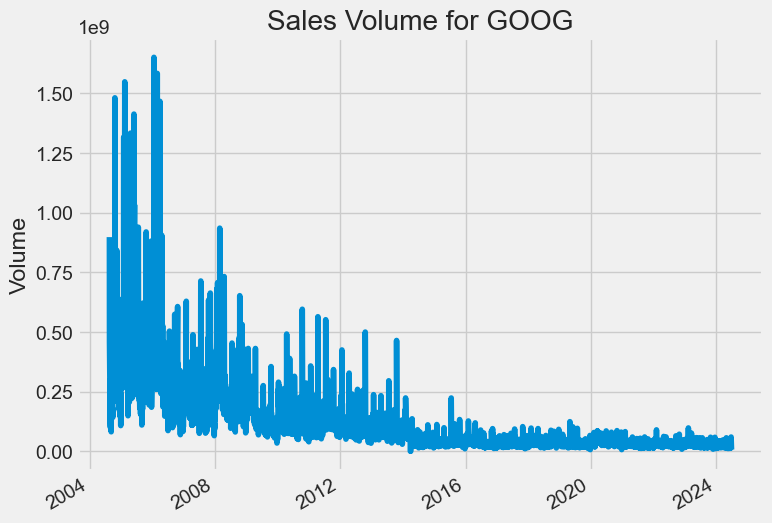

In [17]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()